### Review lecture, example 2:

Frame-based analysis, low-level feature estimation: energy and maxima

The review lecture targets warming up with simple audio signal processing tasks from previous semester. In the second example, we review applying framing to a signal, computing two very simple low-level features for each frame: energy and maximum amplitude.

Your part to be implemented is marked with: #Your code starts here ...  #Your code ends here

In [1]:
import os
import sys
import numpy as np
import essentia.standard as ess
from scipy.fftpack import fft
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd

In [2]:
#Reading a sample wave file
soundsDIR='../data/freesound/'
fs=44100
#Sound downloaded from: https://freesound.org/people/aberrian/sounds/256595/
x = ess.MonoLoader(filename = soundsDIR+'256595__aberrian__uke-single-notes.wav', sampleRate = fs)()
#Normalize maximum amplitude to 1
x=x/np.max(np.abs(x))
#Setting the parameters
windowSize=1024
hopSize=512
startIndexes=np.arange(0, x.size-windowSize,hopSize, dtype=int)#frame/window start indexes
numWindows=startIndexes.size

The energy of a discrete time signal can be computed as:
\begin{equation}
energy = \sum_{n = 0}^{N-1} |x[n]|^2
\end{equation}
where x[n] refers to the discrete time signal sample at index n

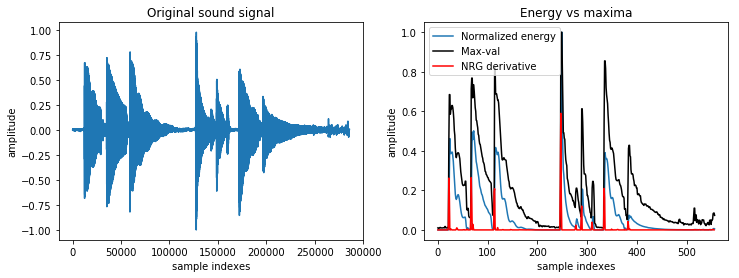

In [3]:
#Plot time-domain signal and the energy signal
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x)
plt.title('Original sound signal')
plt.ylabel('amplitude')
plt.xlabel('sample indexes')
plt.axis('tight')


#Your code starts here----------
#Write the code to perform windowing and feature estimation
# - features to be computed: energy and maximum amplitude
# - plot energy and maximum amplitude

NRG=np.zeros_like(startIndexes,dtype=float)#initializing the array for keeping energy values
maxVal=np.zeros_like(startIndexes,dtype=float)#initializing the array for maximum values

#Windowing (use variables: startIndexes and numWindows)
for k in range(numWindows):
    startInd=startIndexes[k]
    x_win=x[startInd:startInd+windowSize]
    NRG[k]=np.sum(np.power(x_win,2))
    maxVal[k]=np.max(np.abs(x_win))

#Your code ends here----------

#Let's normalize the arrays for the simplicity of viewing them together
NRG=NRG/np.max(NRG)
maxVal=maxVal/np.max(maxVal)
dervNRG=NRG[1:]-NRG[:-1]#let's also compute the derivative of the energy and plot together
dervNRG[dervNRG<0]=0
plt.subplot(1, 2, 2)
plt.plot(NRG,label='Normalized energy')
plt.plot(maxVal,'k',label='Max-val')
plt.plot(dervNRG,'r',label='NRG derivative')
plt.title('Energy vs maxima')
plt.ylabel('amplitude')
plt.xlabel('sample indexes')
plt.axis('tight')
plt.legend(loc='best')
ipd.Audio(x, rate=fs)

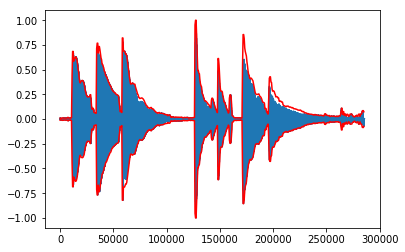

In [4]:
#Optional: Plotting maximum amplitude in sync with the waveform
plt.plot(x)
plt.plot(np.arange(maxVal.size)*(x.size/maxVal.size),maxVal,'r')
plt.plot(np.arange(maxVal.size)*(x.size/maxVal.size),-maxVal,'r')